# Solar
## Goal
* Discover power

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics

# acquire
from pydataset import data
import seaborn as sns

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pydataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(123)

# Acquire
* Data acquired from kaggle
* Import from Plant_1_Generation_Data
* Dataframe contained 68778 rows and 6 columns
* Each row represents a day for a powerplant
* Each column represents a feature of the powerplant

# Prepare
* Removed columns that did not contain useful information

# Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|PLANT_ID| The identification number for the plant|
|DC_POWER| The amount of DC power generated|
|AC_POWER| The amount of AC power generated|
|DAILY_YIELD| The total of AC and DC power generated|
|TOTAL_YIELD| The total yield that the plant has generated over its entire life|

In [2]:
df = pd.read_csv('Plant_1_Generation_Data.csv', index_col=0)
df.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
df = df.drop(columns=['SOURCE_KEY'])
df

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
15-05-2020 00:00,4135001,0.0,0.0,0.000,6259559.0
15-05-2020 00:00,4135001,0.0,0.0,0.000,6183645.0
15-05-2020 00:00,4135001,0.0,0.0,0.000,6987759.0
15-05-2020 00:00,4135001,0.0,0.0,0.000,7602960.0
15-05-2020 00:00,4135001,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...
17-06-2020 23:45,4135001,0.0,0.0,5967.000,7287002.0
17-06-2020 23:45,4135001,0.0,0.0,5147.625,7028601.0
17-06-2020 23:45,4135001,0.0,0.0,5819.000,7251204.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68778 entries, 15-05-2020 00:00 to 17-06-2020 23:45
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLANT_ID     68778 non-null  int64  
 1   DC_POWER     68778 non-null  float64
 2   AC_POWER     68778 non-null  float64
 3   DAILY_YIELD  68778 non-null  float64
 4   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.1+ MB


In [5]:
print(df)

                  PLANT_ID  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DATE_TIME                                                               
15-05-2020 00:00   4135001       0.0       0.0        0.000    6259559.0
15-05-2020 00:00   4135001       0.0       0.0        0.000    6183645.0
15-05-2020 00:00   4135001       0.0       0.0        0.000    6987759.0
15-05-2020 00:00   4135001       0.0       0.0        0.000    7602960.0
15-05-2020 00:00   4135001       0.0       0.0        0.000    7158964.0
...                    ...       ...       ...          ...          ...
17-06-2020 23:45   4135001       0.0       0.0     5967.000    7287002.0
17-06-2020 23:45   4135001       0.0       0.0     5147.625    7028601.0
17-06-2020 23:45   4135001       0.0       0.0     5819.000    7251204.0
17-06-2020 23:45   4135001       0.0       0.0     5817.000    6583369.0
17-06-2020 23:45   4135001       0.0       0.0     5910.000    7363272.0

[68778 rows x 5 columns]


In [6]:
df.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [7]:
df.dtypes

PLANT_ID         int64
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [8]:
df.shape

(68778, 5)

In [9]:
df.columns

Index(['PLANT_ID', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'], dtype='object')

In [10]:
df.index

Index(['15-05-2020 00:00', '15-05-2020 00:00', '15-05-2020 00:00',
       '15-05-2020 00:00', '15-05-2020 00:00', '15-05-2020 00:00',
       '15-05-2020 00:00', '15-05-2020 00:00', '15-05-2020 00:00',
       '15-05-2020 00:00',
       ...
       '17-06-2020 23:45', '17-06-2020 23:45', '17-06-2020 23:45',
       '17-06-2020 23:45', '17-06-2020 23:45', '17-06-2020 23:45',
       '17-06-2020 23:45', '17-06-2020 23:45', '17-06-2020 23:45',
       '17-06-2020 23:45'],
      dtype='object', name='DATE_TIME', length=68778)

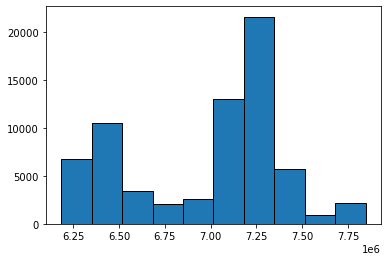

In [11]:
plt.hist(data=df, x='TOTAL_YIELD', edgecolor='black')
plt.show()

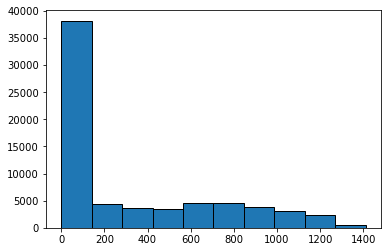

In [12]:
plt.hist(data=df, x='AC_POWER', edgecolor='black')
plt.show()

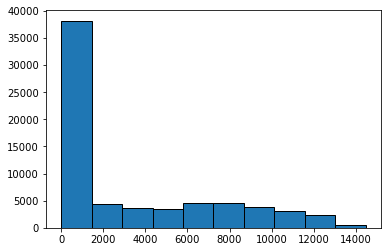

In [13]:
plt.hist(data=df, x='DC_POWER', edgecolor='black')
plt.show()

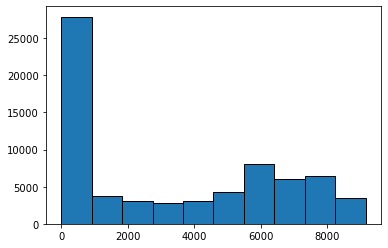

In [15]:
plt.hist(data=df, x='DAILY_YIELD', edgecolor='black')
plt.show()